# **Implementing a Neural Network from Scratch for Planar Data Classification** 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def gen_planar_dataset():
    np.random.seed(1)
    m = 400 
    N = int(m/2) 
    D = 2 
    X = np.zeros((m,D)) 
    Y = np.zeros((m,1), dtype='uint8')
    a = 4 

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [3]:
X, Y = gen_planar_dataset()

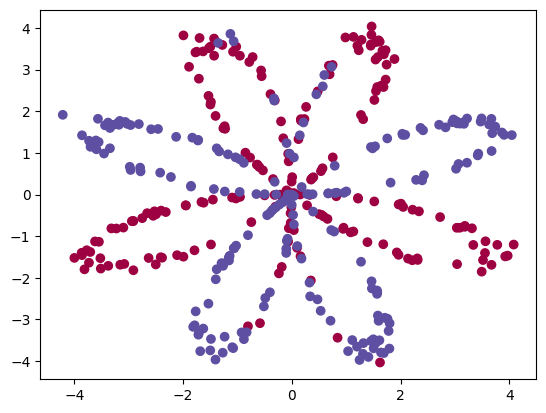

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

In [5]:
X.shape

(2, 400)

In [6]:
Y.shape

(1, 400)

In [7]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # input layer size
    n_h = 4 # hidden layer size
    n_y = Y.shape[0] # output layer size
    
    return (n_x, n_h, n_y)

In [8]:
def initialize_paramters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [10]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost

In [11]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads

In [12]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = copy.deepcopy(parameters['W1'])
    b1 = copy.deepcopy(parameters['b1'])
    W2 = copy.deepcopy(parameters['W2'])
    b2 = copy.deepcopy(parameters['b2'])    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [13]:
def neural_net(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_paramters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
    
    return parameters

In [14]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [15]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.6931621661402946
Cost after iteration 1000: 0.2586250682869045
Cost after iteration 2000: 0.23933351654583135
Cost after iteration 3000: 0.23080163442975737
Cost after iteration 4000: 0.22552802708176348
Cost after iteration 5000: 0.22184467595022694
Cost after iteration 6000: 0.21909438354878738
Cost after iteration 7000: 0.22066570233834548
Cost after iteration 8000: 0.2194098206837993
Cost after iteration 9000: 0.21848533677902204


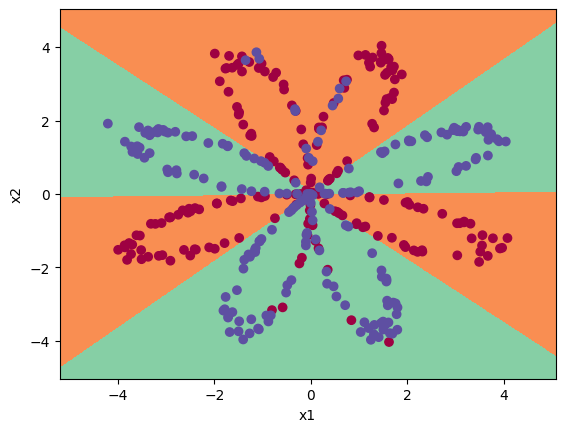

In [16]:
parameters = neural_net(X, Y, n_h=4, num_iterations=10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

In [17]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


/var/folders/l_/z89jsksj64db5cwl1zt337zh0000gn/T/ipykernel_27026/874434534.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
